In [63]:
import numpy as np
import networkx as nx

# Create the graph with edge weights
G = nx.Graph()
G.add_nodes_from([0, 1, 2])
G.add_edge(0, 2, weight=1)  
G.add_edge(0, 1, weight=1) 
# G.add_edge(0, 2, weight=1)  
# G.add_edge(0, 3, weight=1)  



# Compute the Laplacian matrix
L = nx.laplacian_matrix(G).toarray()

# Define sigma
sigma = np.array([-1, -0.2, 1])

# Compute sigma^T sigma
sigma_T_sigma = np.dot(sigma, sigma)

# Compute (L + I)^-1 sigma
I = np.eye(len(L))  # Identity matrix
L_plus_I = L + I
z = np.linalg.inv(L_plus_I).dot(sigma)

# Compute z^T z
z_T_z = np.dot(z, z)

# Output the results
sigma_T_sigma, z_T_z

(np.float64(2.04), np.float64(0.275))

In [64]:
(0.2622222222222222+0.275)/2

0.26861111111111113

In [ ]:
0.2707438016528925

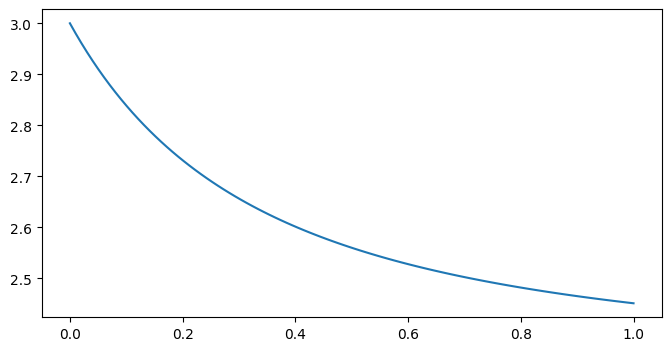

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))  # Set the figure size
# Initialize variables to store results
weights = np.linspace(0, 1, 100)  # Generate 100 weights between 0 and 1
z_T_z_values = []

# Iterate over weights
for weight in weights:
    # Update the weight of edge (0,1)
    G[0][1]['weight'] = weight
    
    # Recompute the Laplacian matrix
    L = nx.laplacian_matrix(G).toarray()
    
    # Recompute (L + I)^-1 sigma
    L_plus_I = L + I
    z = np.linalg.inv(L_plus_I).dot(sigma)
    
    # Compute z^T z
    z_T_z = np.dot(z, z)
    z_T_z_values.append(z_T_z)

# Plot the results
plt.plot(weights, z_T_z_values, label="z_T_z vs weight (0,1)")
# plt.xlabel("Weight on edge (0,1)")
# plt.ylabel("z_T_z")
# plt.title("z_T_z vs Weight on Edge (0,1)")
# plt.legend()
# plt.grid()
plt.show()


In [8]:
(0.7155555555555555+0.7187500000000001)/2

0.7171527777777778

In [ ]:
import numpy as np
import networkx as nx

# Create the graph
G = nx.Graph()
G.add_nodes_from([0, 1, 2])
G.add_edge(0, 2)  # Edge between node 0 and 2

# Compute the Laplacian matrix
L = nx.laplacian_matrix(G).toarray()

# Define sigma
sigma = np.array([0, 0.4, 1])

# Compute sigma^T sigma
sigma_T_sigma = np.dot(sigma, sigma)

# Compute (L + I)^-1 sigma
I = np.eye(len(L))  # Identity matrix
L_plus_I = L + I
z = np.linalg.inv(L_plus_I).dot(sigma)

# Compute z^T z
z_T_z = np.dot(z, z)

# Output the results
sigma_T_sigma, z_T_z

In [36]:
def hex_to_rgb(hex_code):
    return tuple(int(hex_code[i:i+2], 16) for i in (1, 3, 5))

def rgb_to_hex(rgb_tuple):
    return '#' + ''.join(f'{c:02X}' for c in rgb_tuple)

def interpolate_color(c1, c2, t):
    # t ∈ [0, 1] for interpolation between c1 and c2
    return tuple(int((1 - t) * a + t * b) for a, b in zip(c1, c2))

# Example usage:
start = "#F24822"  # red
end   = "#3DADFF"  # blue

c1 = hex_to_rgb(start)
c2 = hex_to_rgb(end)

interpolated_rgb = interpolate_color(c1, c2, 0.5)  # halfway
interpolated_hex = rgb_to_hex(interpolated_rgb)

print(interpolated_hex)  # Output: '#800080' (purple)


#977A90


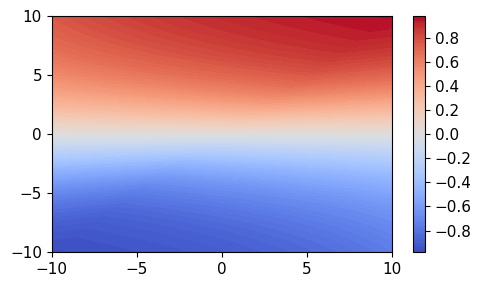

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 11})  # or any value you like

# Define parameters
alpha = 0.2
delta_t = 40

# Define the function
def influence_function(sigma_i, sigma_j, alpha=alpha, delta_t=delta_t):
    h = alpha * (1 - np.abs(sigma_i - sigma_j) / delta_t)
    # h= alpha  # This line seems to override the previous calculation, keeping it simple
    return np.tanh(h * sigma_j)

# Create a grid of sigma_i and sigma_j values
sigma_range = np.linspace(-10, 10, 400)
sigma_i, sigma_j = np.meshgrid(sigma_range, sigma_range)

# Compute the function values
values = influence_function(sigma_i, sigma_j)

# Plotting
plt.figure(figsize=(5, 3))
cmap = plt.get_cmap('coolwarm')  # blue-white-red colormap
plt.contourf(sigma_i, sigma_j, values, levels=100, cmap=cmap)
plt.colorbar()
# plt.xlabel('target opinion')
# plt.ylabel('source opinion')
# plt.title(r'$\tanh\left(\alpha\left(1 - \frac{|\sigma_i - \sigma_j|}{\delta_t}\right)\cdot \sigma_j\right)$')
plt.grid(False)
plt.tight_layout()
plt.show()


In [1]:
from evaluation import *
from visualization import *
from env import NLOpinionDynamics

env = NLOpinionDynamics(n = 200, alpha=0.2, beta=1, gamma = 0.6, average_degree=6, n_edge_updates_per_step = 5)

In [ ]:
recorded_opinions_1 = {}
for alpha, beta, gamma in [(0.2, 1, 0.6), (0.1, 1, 0.6), (0.4, 1, 0.6), (0.2, 0.5, 0.6), (0.2, 2, 0.6), (0.2, 1, 0.3), (0.2, 1, 0.9)]:
    env = NLOpinionDynamics(n = 200, alpha=alpha, beta=beta, gamma=gamma, average_degree=6, n_edge_updates_per_step = 5)
    recorded_opinions_1[(alpha, beta, gamma)] = test_policy(env, n_steps=40000, n_simpulations=6)

np.save("recorded_opinions_1.npy", recorded_opinions_1, allow_pickle=True)

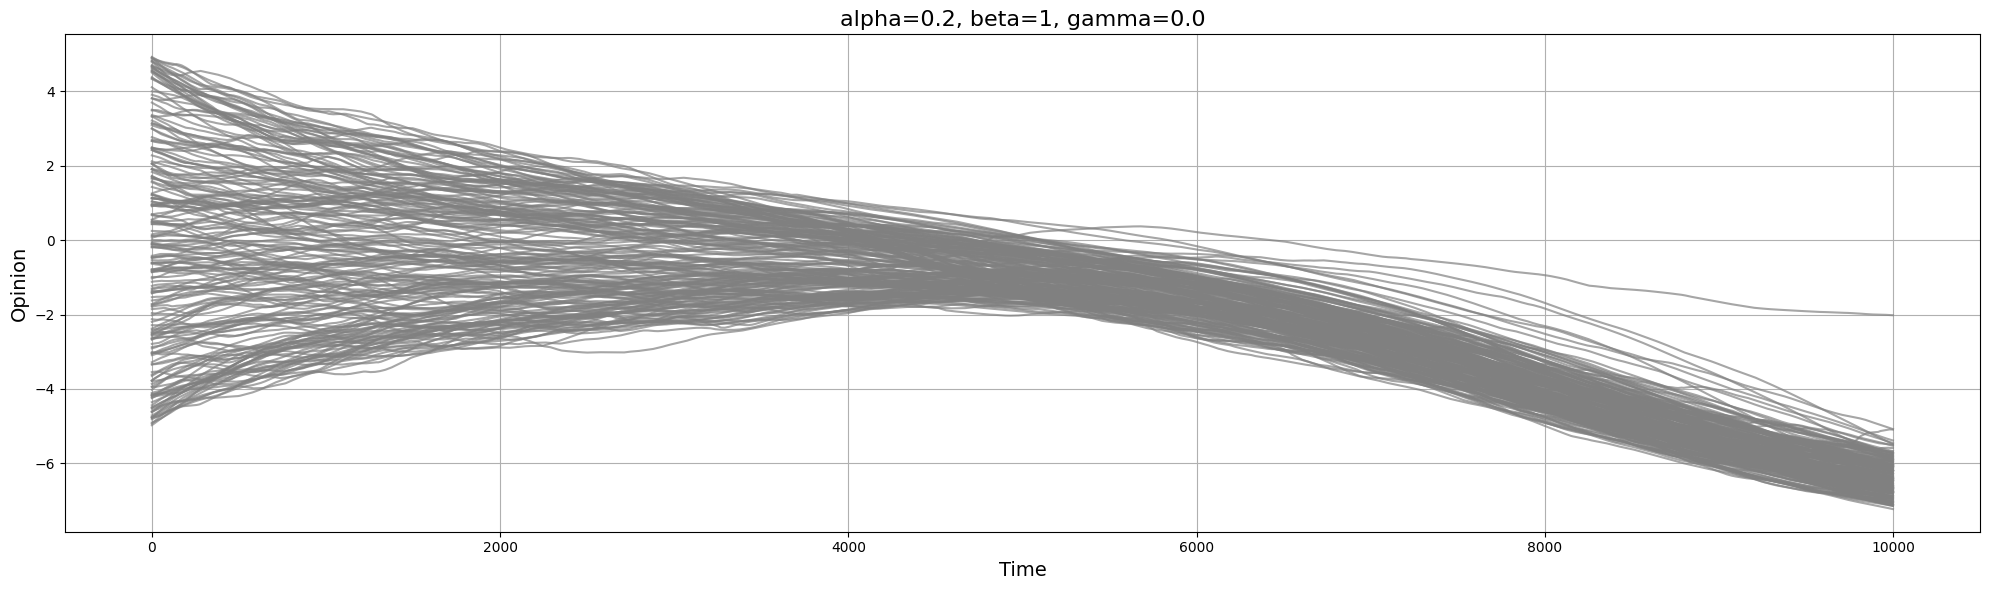

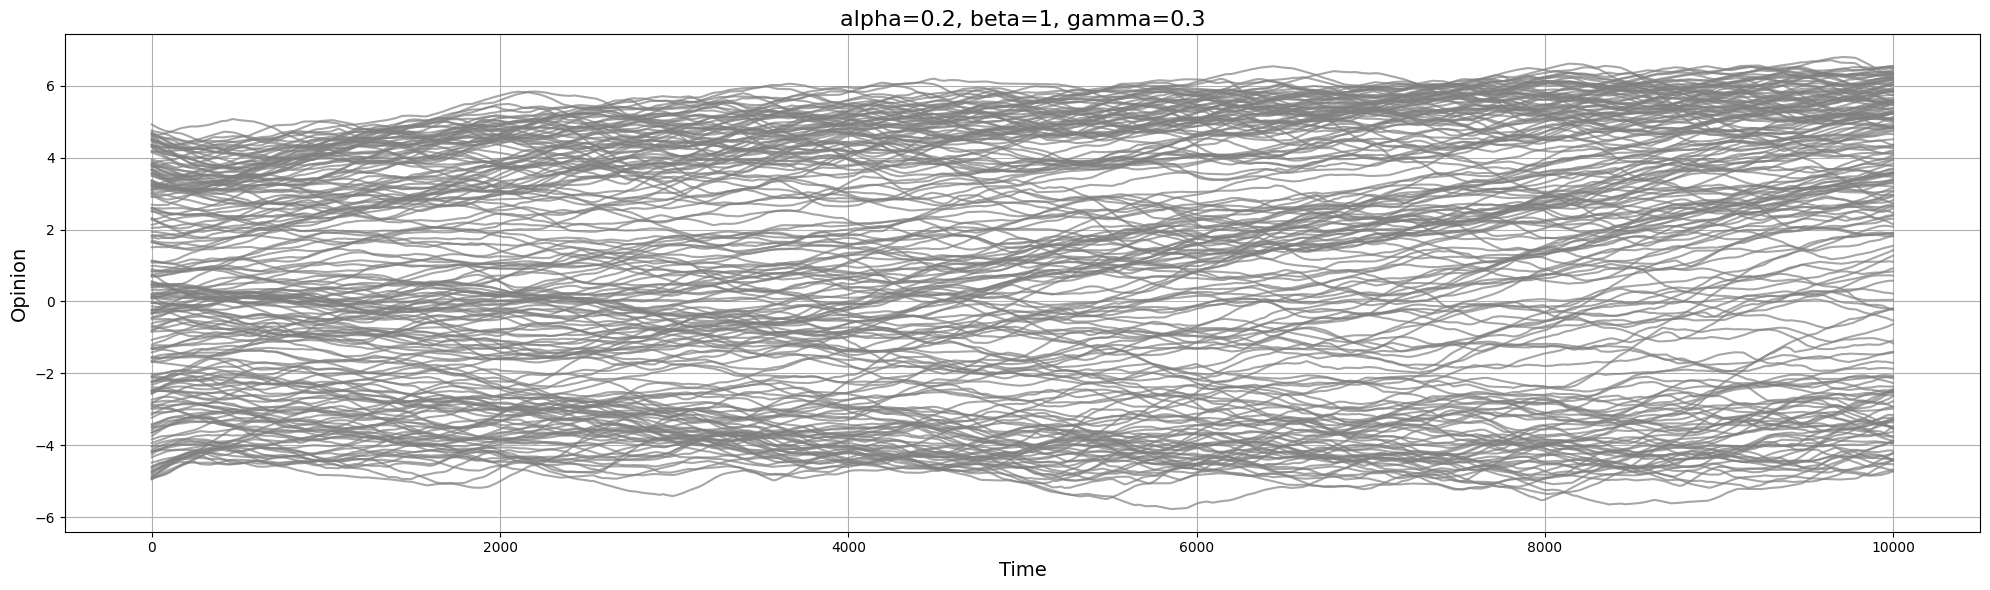

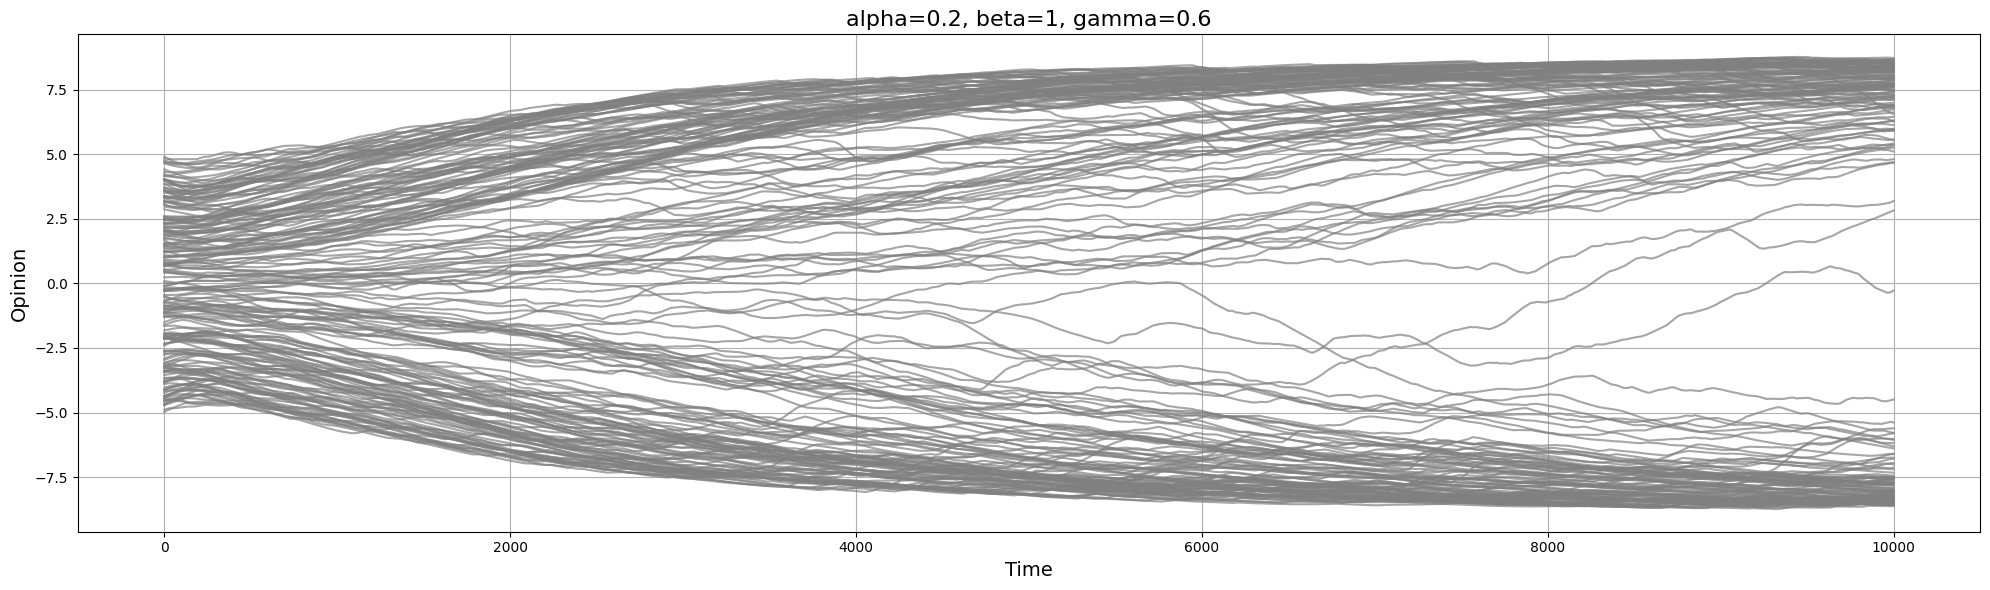

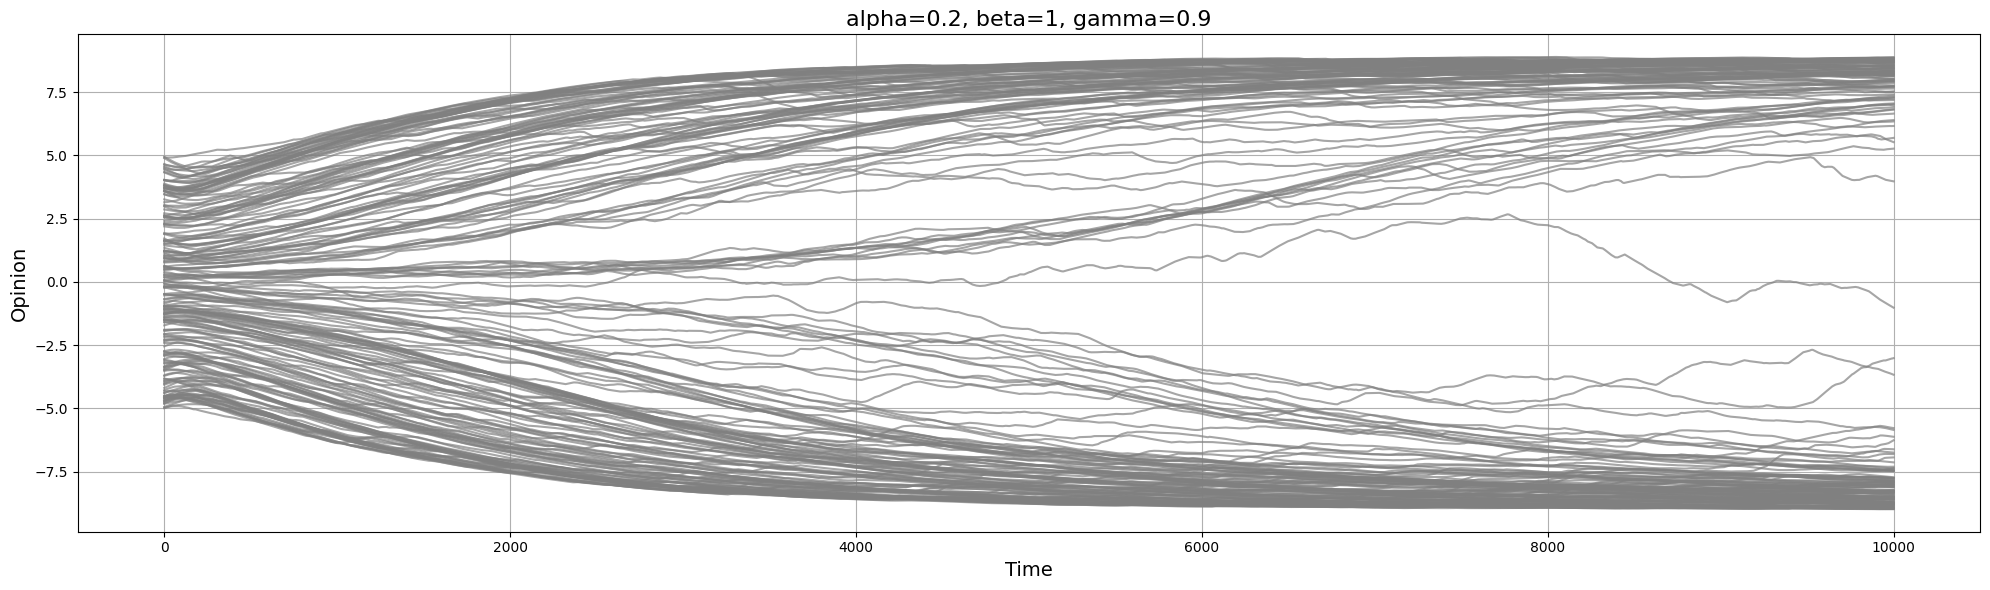

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Load your dictionary if needed:
# recorded_opinions = np.load("recorded_opinions.npy", allow_pickle=True).item()

alphas = [0.2]
betas = [1]
gammas = [0.0, 0.3, 0.6, 0.9]

for alpha in alphas:
    for beta in betas:
        for gamma in gammas:
            # Get the opinion trajectory for one of the simulations (e.g., index 1)
            try:
                recorded_opinions_array = np.array(recorded_opinions[(alpha, beta, gamma)][1])  # shape: (n_times, n_nodes)
            except KeyError:
                print(f"No data for combination: alpha={alpha}, beta={beta}, gamma={gamma}")
                continue
            
            time_steps = np.arange(0, len(recorded_opinions_array))
            n_nodes = recorded_opinions_array.shape[1]

            plt.figure(figsize=(20, 6))
            for node in range(n_nodes):
                plt.plot(time_steps, recorded_opinions_array[:, node], alpha=0.7, color="gray")

            plt.xlabel("Time", fontsize=14)
            plt.ylabel("Opinion", fontsize=14)
            plt.title(f"alpha={alpha}, beta={beta}, gamma={gamma}", fontsize=16)
            plt.grid(True)
            plt.tight_layout()
            plt.show()


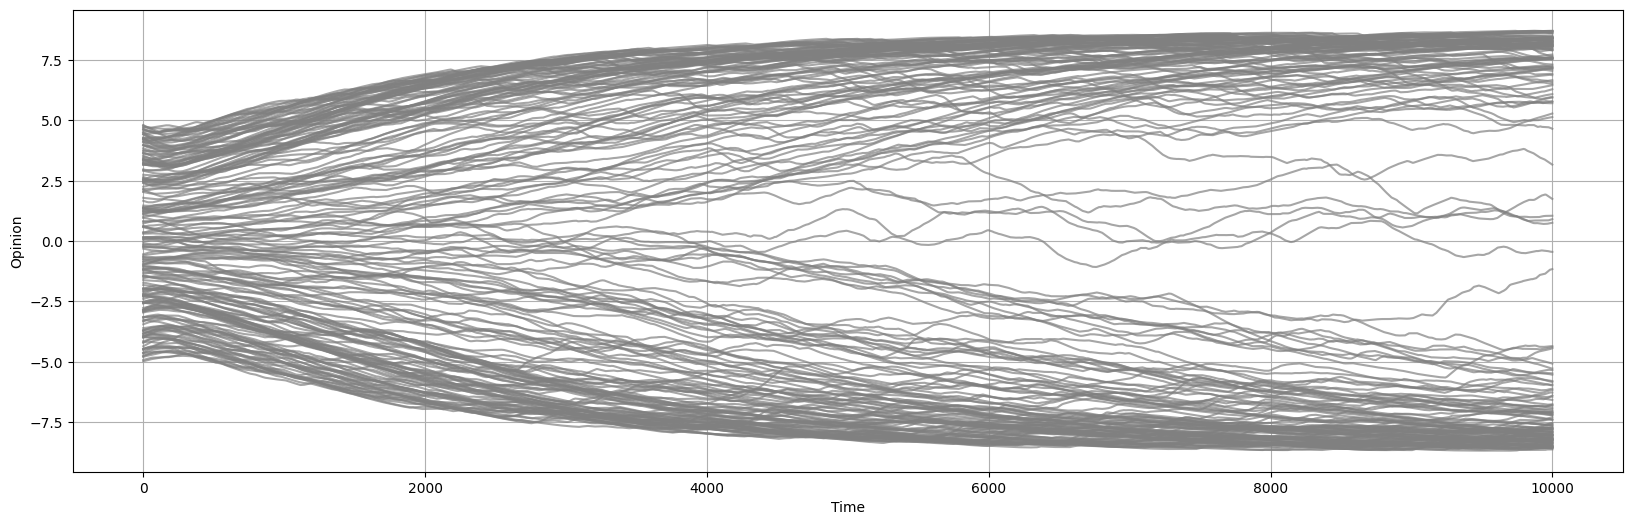

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

recorded_opinions_array = np.array(recorded_opinions[(alpha, beta, gamma)][1]) # shape: (n_times, n_nodes)
time_steps = np.arange(0, len(recorded_opinions_array))

plt.figure(figsize=(20, 6))
for node in range(env.n):
    plt.plot(time_steps, recorded_opinions_array[:, node], alpha=0.7, color="gray")

plt.xlabel("Time")
plt.ylabel("Opinion")
plt.grid(True)
plt.show()

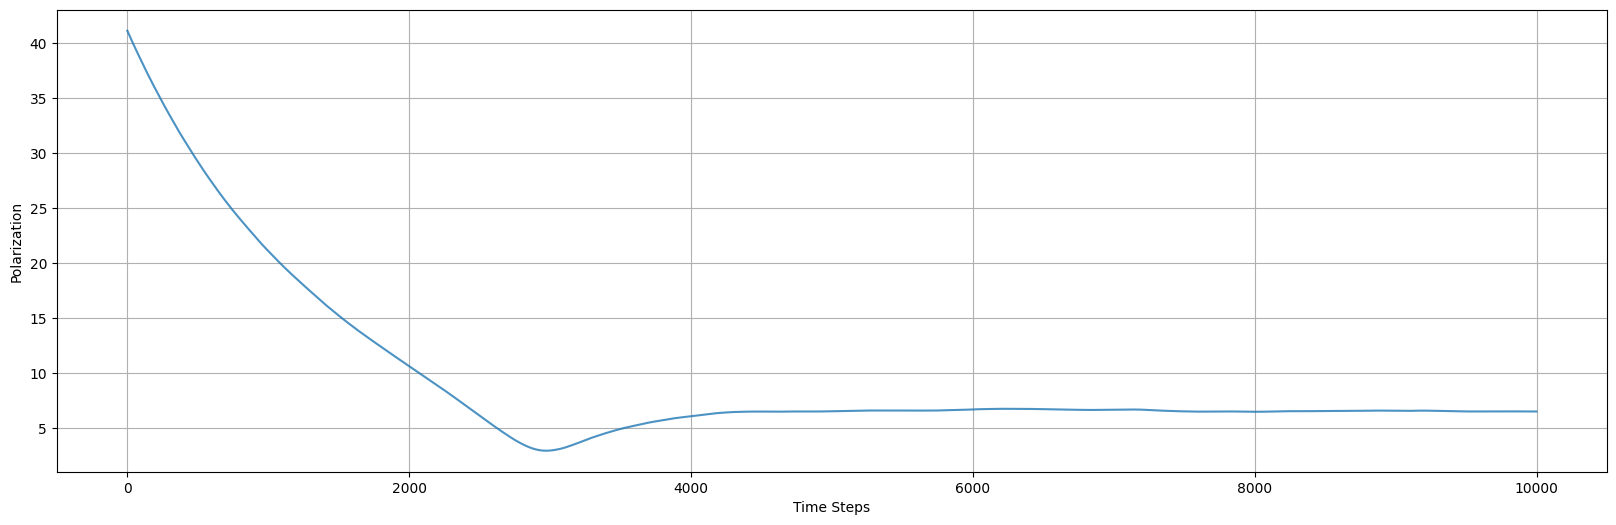

In [37]:
def average_pol(opinions_array):
    # Calculate polarization for each time step across all simulations
    polarization_per_step = [
        np.mean([np.linalg.norm(opinions) for opinions in opinions_array[:, step, :]])
        for step in range(opinions_array.shape[1])
    ]
    return np.array(polarization_per_step)

# Visualize the average polarization over time
plt.figure(figsize=(20, 6))
for (strat, opinions_array) in [("no_strat", recorded_opinions_01_00)]:
    plt.plot(np.arange(0, opinions_array.shape[1]), average_pol(opinions_array), label=strat, alpha=0.8)

plt.xlabel("Time Steps")
plt.ylabel("Polarization")
# plt.title(title)
plt.grid(True)
# plt.legend(fontsize=18)
plt.show()

In [ ]:
recorded_graphs = []
state = env.reset()
for time_step in range(1, 20000):
    action = 0
    next_state, _, _ = env.step(action)
    if time_step % 500 == 0:
        recorded_graphs.append((next_state['graph'], next_state['opinions']))
    state = next_state

In [ ]:
G = recorded_graphs[0][0]
opinions = recorded_graphs[0][1]

cmap = plt.cm.coolwarm  # Blue-White-Red colormap
norm = plt.Normalize(vmin=-10, vmax=10)  # Normalize opinions to the range [-10, 10]
colors = [cmap(norm(opinion)) for opinion in opinions]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Use a consistent layout for the graph
nx.draw(
    G,
    pos=pos,
    node_color=colors,
    with_labels=False,
    node_size=100,
    edge_color="gray",
)